In [9]:
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
import pandas as pd  
#import numpy as np  
#import matplotlib.pyplot as plt  
%matplotlib inline

import sklearn.metrics as metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [3]:
data = pd.read_csv('csunplugged.csv')
data.shape
data = data[0:360]
gender = {'M': 1, 'F': 2}
data.Gender = [gender[item] for item in data.Gender]
result_before = {'P': 1, 'F': 0}
# result_after = {'P': 1, 'F': 0}
data.Results_Before = [result_before[item] for item in data.Results_Before]
# data.Results_After = [result_after[item] for item in data.Results_After]

In [4]:
data =data[['Age','Gender','Class','Results_Before', 'Results_After']]

In [5]:
array = data.values
X = array[:,0:4]
Y = array[:,4:]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

c = [10 ** (-3), 10 ** (-2), 10 ** (-1), 10 ** 0, 10 ** 1, 10 ** 2, 10 ** 3]
g = [10 ** (-9), 10 ** (-7), 10 ** (-5), 10 ** (-3)]
best_values = [0.0, 0.0, 0.0]  # respectively best success rate, best C and best gamma

k_fold = KFold(n_splits=5)

print('Performing 5-Fold validation on Polynomial')
for i in c:
    plt.figure(figsize=(40, 20))
#     for j in g:
    for id_train, id_test in k_fold.split(x_train):
        svc = svm.SVC(kernel='poly',C=1, degree=3)
        score = svc.fit(x_train[id_train], y_train[id_train]).score(x_train[id_test], y_train[id_test])
        print('With C=' + str(i) + ' avg=' + str(score))
        if score > best_values[0]:
            best_values = score, i

print('Best accuracy=' + str(best_values[0]) + ' with C=' + str(best_values[1]) )
#       + ' and gamma=' + str(best_values[2]))

# With the best C ang gamma evaluating k-fold on test set
print('Evaluating test set')
svc = svm.SVC(kernel='poly', C=best_values[1], degree=3)
#               , gamma=best_values[2])
svc.fit(x_train, y_train)
print(svc.score(x_test, y_test))

Performing 5-Fold validation on Polynomial


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=0.001 avg=0.7450980392156863


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=0.001 avg=0.7450980392156863


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=0.001 avg=0.78


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=0.001 avg=0.76


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=0.001 avg=0.72


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=0.01 avg=0.7450980392156863


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=0.01 avg=0.7450980392156863


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=0.01 avg=0.78


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=0.01 avg=0.76


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=0.01 avg=0.72


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=0.1 avg=0.7450980392156863


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=0.1 avg=0.7450980392156863


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=0.1 avg=0.78


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=0.1 avg=0.76


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=0.1 avg=0.72


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=1 avg=0.7450980392156863


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=1 avg=0.7450980392156863


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=1 avg=0.78


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=1 avg=0.76


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=1 avg=0.72


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=10 avg=0.7450980392156863


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=10 avg=0.7450980392156863


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=10 avg=0.78


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=10 avg=0.76


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=10 avg=0.72


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=100 avg=0.7450980392156863


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=100 avg=0.7450980392156863


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=100 avg=0.78


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=100 avg=0.76


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=100 avg=0.72


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=1000 avg=0.7450980392156863


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=1000 avg=0.7450980392156863


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=1000 avg=0.78


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=1000 avg=0.76


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


With C=1000 avg=0.72
Best accuracy=0.78 with C=0.001
Evaluating test set
0.7592592592592593


C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<Figure size 2880x1440 with 0 Axes>

<Figure size 2880x1440 with 0 Axes>

<Figure size 2880x1440 with 0 Axes>

<Figure size 2880x1440 with 0 Axes>

<Figure size 2880x1440 with 0 Axes>

<Figure size 2880x1440 with 0 Axes>

<Figure size 2880x1440 with 0 Axes>

In [12]:
predictions = svc.predict(x_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.7592592592592593
              precision    recall  f1-score   support

           F       0.00      0.00      0.00        26
           P       0.76      1.00      0.86        82

   micro avg       0.76      0.76      0.76       108
   macro avg       0.38      0.50      0.43       108
weighted avg       0.58      0.76      0.66       108



C:\Users\Hadiqa Alamdar .LAPTOP-ISS9B762\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AUC: 0.500


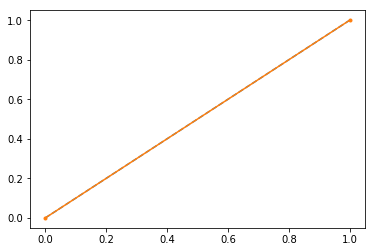

In [13]:
testy = []
probsy = []
probs = predictions[:]
for i in range(len(probs)):
    if (probs[i] == 'F'):
        probsy.append(0)
    else:
        probsy.append(1)
#     print(i)
for i in range(len(y_test)):
    if (y_test[i][0] == 'F'):
        testy.append(0)
    else:
        testy.append(1)
#     print (i)
# calculate AUC
auc = roc_auc_score(testy, probsy)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probsy)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()